# Parkinsons Disease Diagnostic System

## Preamble

In this project ,I have used attributes consisting of range of biomedical voice measurements in order to detect healthy person 

from the person with Parkinson's disease.I have used Logistic Regression and Random Forest Classifier to detect if the person 

has parkinson's disease or not and compared the models on various factors such as accuracy ,f1_score, recall etc .


## Data Understanding

Data Name: Parkinsons Dataset

Data URL: https://archive.ics.uci.edu/ml/datasets/parkinsons

File type: csv file

No. of columns=24

No. of rows=195

Data Attribute Detail:

There are 24 attritute in the dataset .These are listed below:

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

Name attritute was not useful for the prediction model and hence was removed.

There was one output attribute named Status in the dataset.

In [41]:
import pandas as pd
df=pd.read_table(r"C:\Users\jahanvi\Downloads\parkinsons (1).csv",delimiter=",")
print(df)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

In [42]:
df.shape

(195, 24)

In [43]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [44]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Importing data (https://archive.ics.uci.edu/ml/datasets/parkinsons)

## Data Preparation

 Checked if the datatype of each column is correct .If there are any junk value it can be detected through this.Since all the datatypes are right it can be assumed there are no junk values.

### Data Wrangling and Cleaning

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Checking null values

In [46]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Spliting Output variable and Dropping Name column since it is not required. 

In [47]:
y=df["status"]
df=df.drop(columns=["status"])
print(y)

print(df)
df_copy=df.copy()
df_copy=df_copy.drop(columns=["name"])
print(df_copy)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64
               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904 

Checking unique output values


In [48]:
print(y.unique())

[1 0]


### Analysing Correlation 

In [69]:
corr=df.corr()


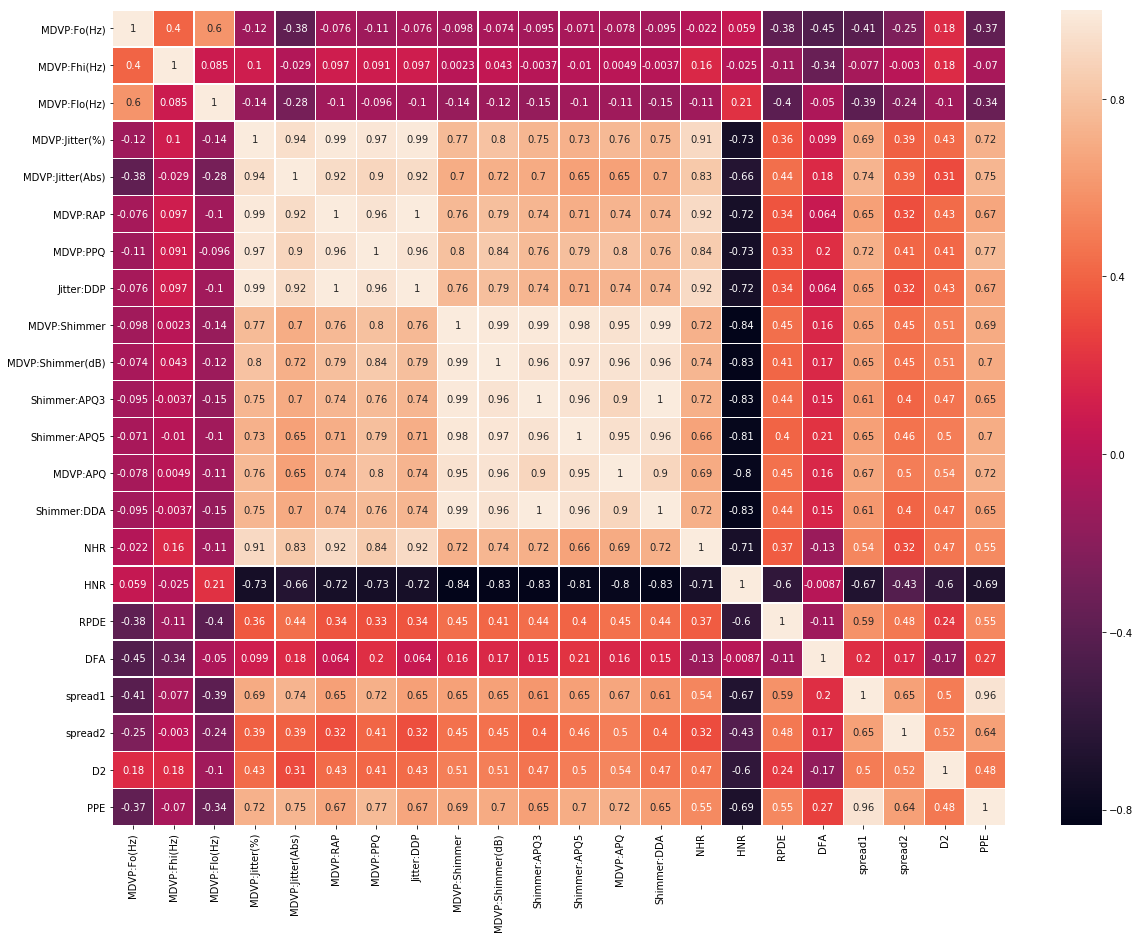

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, linewidths=.3)

In [83]:
co=abs(corr.replace(1,0))

In [90]:
print((co.max()).max())

0.9999999636932829


In [91]:
co.idxmax()

MDVP:Fo(Hz)             MDVP:Flo(Hz)
MDVP:Fhi(Hz)             MDVP:Fo(Hz)
MDVP:Flo(Hz)             MDVP:Fo(Hz)
MDVP:Jitter(%)            Jitter:DDP
MDVP:Jitter(Abs)      MDVP:Jitter(%)
MDVP:RAP                  Jitter:DDP
MDVP:PPQ              MDVP:Jitter(%)
Jitter:DDP                  MDVP:RAP
MDVP:Shimmer             Shimmer:DDA
MDVP:Shimmer(dB)        MDVP:Shimmer
Shimmer:APQ3             Shimmer:DDA
Shimmer:APQ5            MDVP:Shimmer
MDVP:APQ            MDVP:Shimmer(dB)
Shimmer:DDA             Shimmer:APQ3
NHR                       Jitter:DDP
HNR                     MDVP:Shimmer
RPDE                             HNR
DFA                      MDVP:Fo(Hz)
spread1                          PPE
spread2                      spread1
D2                               HNR
PPE                          spread1
dtype: object

In [92]:
co.max().idxmax()

'Shimmer:APQ3'

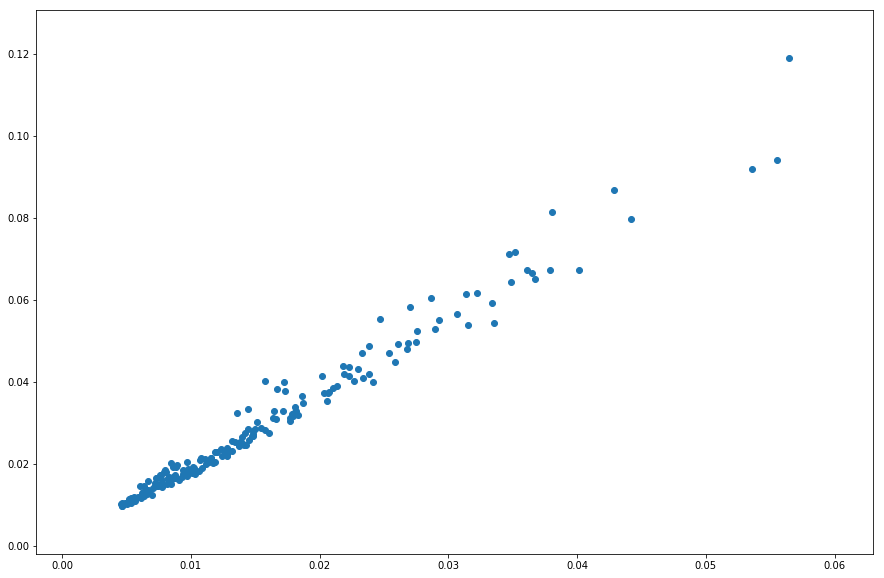

In [124]:
plt.subplots(figsize=(15,10))
plt.scatter(df_copy["Shimmer:APQ3"],df_copy ["MDVP:Shimmer"])# visual representation of maximum correlation in dataset

In [123]:
zero=y.isin([0]).sum()

In [109]:
one=y.isin([1]).sum()

<BarContainer object of 2 artists>

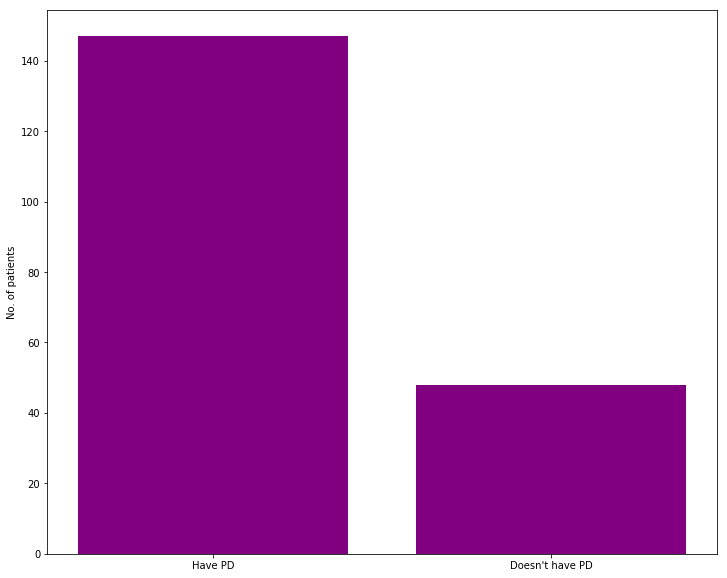

In [126]:
plt.subplots(figsize=(12,10))
plt.ylabel("No. of patients")
x_axis=["Have PD","Doesn't have PD"]
y_axis=[one,zero]
plt.bar(x_axis,y_axis,color="purple" )

## Data Modeling 

### Importing Libraries

In [26]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.ensemble import RandomForestClassifier

### Spliting training and testing data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_copy, y, test_size=0.20, random_state=42)

### Prediction using Logistic Regression

Since the dataset has only two output values the problem can be defined as a classification problem. In this case logistic regression is used in order to predict output.

In [28]:
model = LogisticRegression(solver='liblinear', random_state=0)
model=model.fit(X_train,y_train) 
y_pre=model.predict(X_test) 
print(y_pre)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 0]


In [29]:
m.accuracy_score(y_test, y_pre)

0.8717948717948718

In [30]:
cm = m.confusion_matrix(y_test,y_pre)
print(cm)

[[ 3  4]
 [ 1 31]]


In [31]:
recall=cm[0][0]/(cm[0][0]+cm[1][0])
print(recall)

0.75


In [32]:
m.f1_score(y_test, y_pre)

0.9253731343283582

### Prediction using Random Forest Classifier

Random Forest Classifer Can also be used in case of classification.

In [33]:

classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train,y_train) 
predicted=classifier.predict(X_test) 
cm1=m.confusion_matrix(y_test, predicted)
print ('Confusion Matrix :') 
print(cm1) 
print ('Accuracy Score :',m.accuracy_score(y_test, predicted)) 

Confusion Matrix :
[[ 5  2]
 [ 1 31]]
Accuracy Score : 0.9230769230769231


C:\Users\jahanvi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
recall1=cm1[0][0]/(cm1[0][0]+cm1[1][0])
print(recall1)

0.8333333333333334


In [35]:
m.f1_score(y_test,predicted)


0.9538461538461539

## Evaluation and analysis of outcomes 

For Logistic regression:

Accuracy=87.18%(approx)

recall=0.75

f1_score=0.9253731343283582

For Random forest Classifier:

Accuracy=92.3%(approx)

recall=0.8333333333333334

f1_score=0.9538461538461539

    
Though random forest classifier gives better results in all the three parameters ,in the this senerio risk of not detecting a 

positive is high therefore we consider recall as a better way of comparing models. And as Random Forest Classifier gives better 

recall than logistic regression it can be said Random forest classifier gives better result in this case.


## Use of project


Parkinson's disease (PD), a degenerative disorder of the central nervous system, is the second most common neurodegenerative 
disease . The number of people suffering from PD has increased rapidly worldwide.

The intial symtoms of the disease consist of phonation and speech disorders which can appear in PD patients as many as five years before being clinically diagnosed with the 
illness.

In this case ,this system can help diagnose the PD patients and can give results much earlier than expected which can reduce a lot of burden both on those affected, as well as their families.
 